In [ ]:
pip install pandas numpy scikit-learn xgboost lightgbm matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("mutual_funds_data.csv")  # Change filename accordingly


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

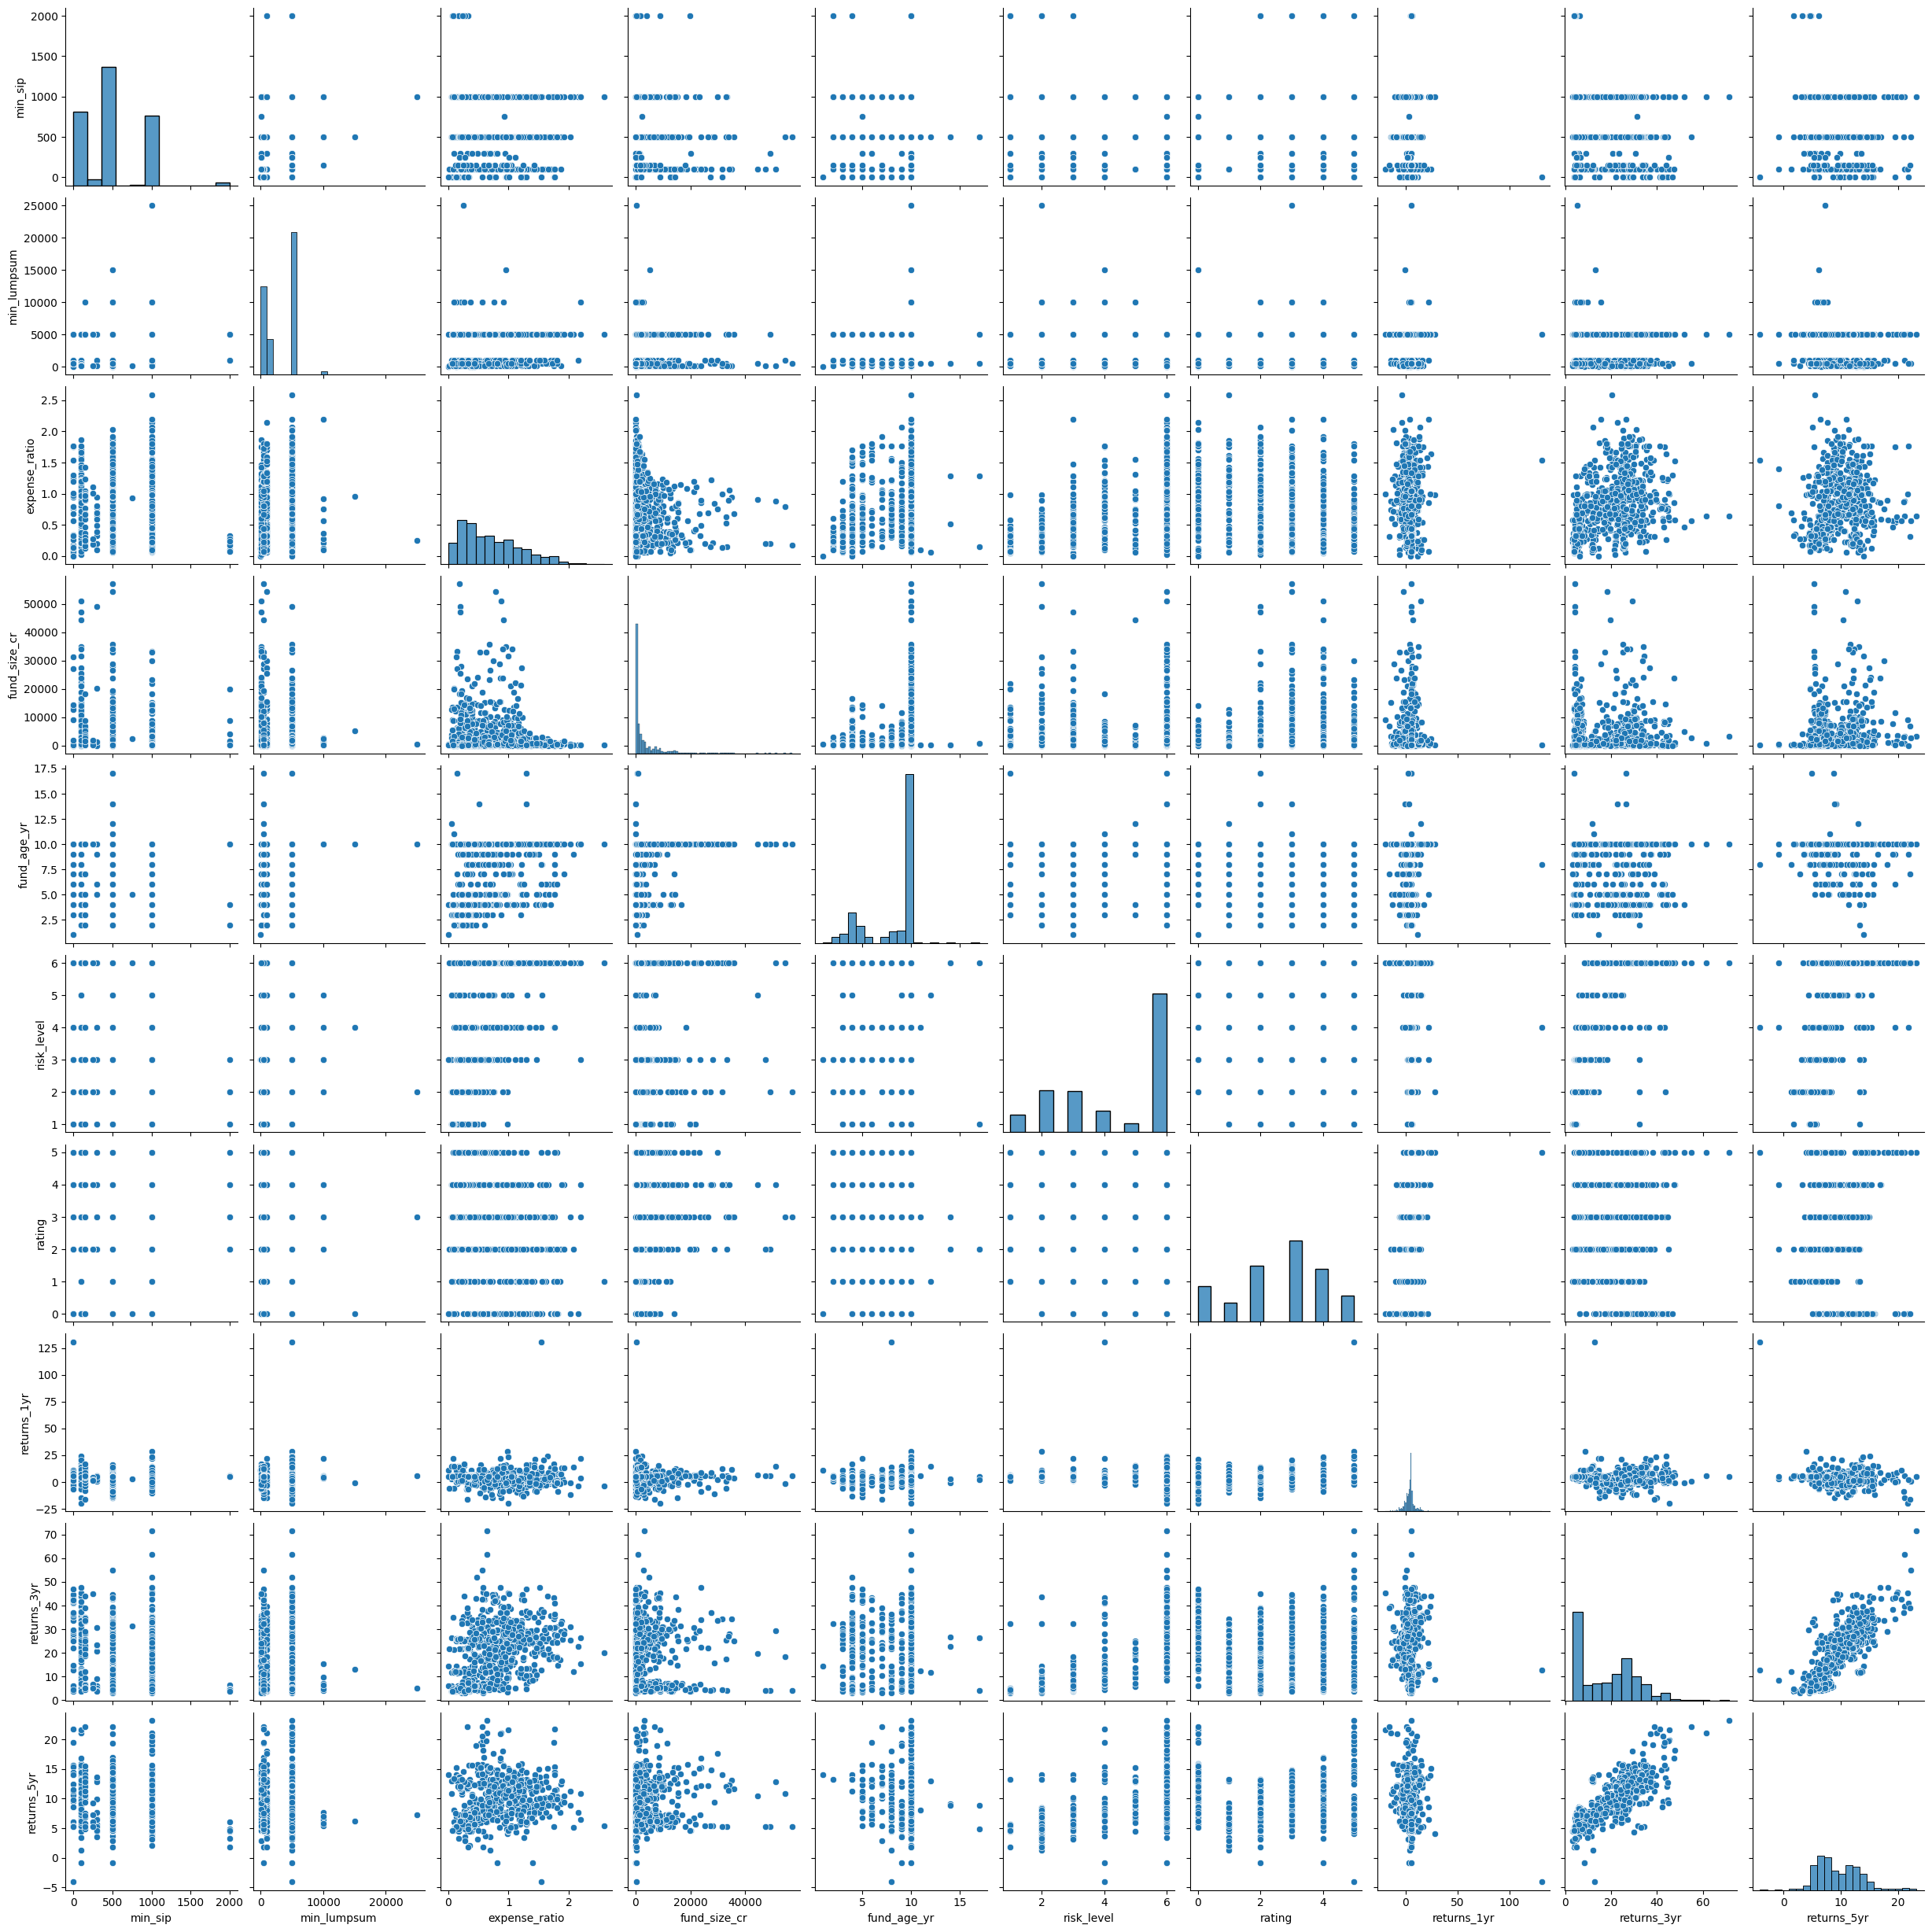

In [ ]:
sns.pairplot(df)
plt.show()


In [ ]:
df = df.dropna()  # Drop or impute missing values if required


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df.columns)  # Display all column names


Index(['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr',
       'fund_age_yr', 'risk_level', 'rating', 'returns_1yr', 'returns_3yr',
       'returns_5yr',
       ...
       'sub_category_Money Market Funds',
       'sub_category_Multi Asset Allocation Mutual Funds',
       'sub_category_Multi Cap Funds', 'sub_category_Overnight Mutual Funds',
       'sub_category_Retirement Funds',
       'sub_category_Sectoral / Thematic Mutual Funds',
       'sub_category_Short Duration Funds',
       'sub_category_Small Cap Mutual Funds',
       'sub_category_Ultra Short Duration Funds', 'sub_category_Value Funds'],
      dtype='object', length=2622)


In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
df.columns = df.columns.str.lower()  # Convert to lowercase for consistency

print(df.columns)  # Check updated names


Index(['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr',
       'fund_age_yr', 'risk_level', 'rating', 'returns_1yr', 'returns_3yr',
       'returns_5yr',
       ...
       'sub_category_money_market_funds',
       'sub_category_multi_asset_allocation_mutual_funds',
       'sub_category_multi_cap_funds', 'sub_category_overnight_mutual_funds',
       'sub_category_retirement_funds',
       'sub_category_sectoral_/_thematic_mutual_funds',
       'sub_category_short_duration_funds',
       'sub_category_small_cap_mutual_funds',
       'sub_category_ultra_short_duration_funds', 'sub_category_value_funds'],
      dtype='object', length=2622)


In [ ]:
print(df.columns.tolist())  # Display column names as a list


['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'risk_level', 'rating', 'returns_1yr', 'returns_3yr', 'returns_5yr', 'scheme_name_axis_balanced_advantage_fund', 'scheme_name_axis_banking_&_psu_debt_fund', 'scheme_name_axis_bluechip_fund', 'scheme_name_axis_children’s_gift_fund', 'scheme_name_axis_corporate_debt_fund', 'scheme_name_axis_credit_risk_fund', 'scheme_name_axis_dynamic_bond_fund', 'scheme_name_axis_equity_saver_fund', 'scheme_name_axis_ftp_–_series_104_–_1112days', 'scheme_name_axis_ftp_–_series_109_–_111days', 'scheme_name_axis_flexi_cap_fund', 'scheme_name_axis_focused_25_fund', 'scheme_name_axis_gilt_fund', 'scheme_name_axis_gold_fund', 'scheme_name_axis_liquid_fund', 'scheme_name_axis_long_term_equity_fund', 'scheme_name_axis_midcap_fund', 'scheme_name_axis_regular_saver_fund', 'scheme_name_axis_short_term_fund', 'scheme_name_axis_small_cap_fund', 'scheme_name_axis_strategic_bond_fund', 'scheme_name_axis_treasury_advantage_fund', 'scheme_name_a

In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
df.columns = df.columns.str.lower()  # Convert to lowercase for consistency

print(df.columns.tolist())  # Check the corrected names


['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'risk_level', 'rating', 'returns_1yr', 'returns_3yr', 'returns_5yr', 'scheme_name_axis_balanced_advantage_fund', 'scheme_name_axis_banking_&_psu_debt_fund', 'scheme_name_axis_bluechip_fund', 'scheme_name_axis_children’s_gift_fund', 'scheme_name_axis_corporate_debt_fund', 'scheme_name_axis_credit_risk_fund', 'scheme_name_axis_dynamic_bond_fund', 'scheme_name_axis_equity_saver_fund', 'scheme_name_axis_ftp_–_series_104_–_1112days', 'scheme_name_axis_ftp_–_series_109_–_111days', 'scheme_name_axis_flexi_cap_fund', 'scheme_name_axis_focused_25_fund', 'scheme_name_axis_gilt_fund', 'scheme_name_axis_gold_fund', 'scheme_name_axis_liquid_fund', 'scheme_name_axis_long_term_equity_fund', 'scheme_name_axis_midcap_fund', 'scheme_name_axis_regular_saver_fund', 'scheme_name_axis_short_term_fund', 'scheme_name_axis_small_cap_fund', 'scheme_name_axis_strategic_bond_fund', 'scheme_name_axis_treasury_advantage_fund', 'scheme_name_a

In [ ]:
# Drop target variables to create the feature set
X = df.drop(columns=["returns_1yr", "returns_3yr", "returns_5yr"])

# Define target variables
y_1Y = df["returns_1yr"]
y_3Y = df["returns_3yr"]
y_5Y = df["returns_5yr"]



In [ ]:
# Import required library
from sklearn.model_selection import train_test_split

# Split data for predicting 1-year return
X_train, X_test, y_train, y_test = train_test_split(X, y_1Y, test_size=0.2, random_state=42)



In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 3.58
Mean Squared Error: 144.04
R² Score: 0.02


In [ ]:
new_data = X_test.iloc[:5]  # Take 5 test samples
predictions = model.predict(new_data)

print("Predicted 1M Returns:", predictions)


Predicted 1M Returns: [5.516 3.452 5.648 4.82  5.357]


In [ ]:
from sklearn.model_selection import train_test_split

# Split data for 3M, 6M, and 1Y returns
X_train, X_test, y_train_3M, y_test_3M = train_test_split(X, y_3Y, test_size=0.2, random_state=42)
#X_train, X_test, y_train_6M, y_test_6M = train_test_split(X, y_6M, test_size=0.2, random_state=42)
X_train, X_test, y_train_1Y, y_test_1Y = train_test_split(X, y_1Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize separate models
model_3M = RandomForestRegressor(n_estimators=100, random_state=42)
#model_6M = RandomForestRegressor(n_estimators=100, random_state=42)
model_1Y = RandomForestRegressor(n_estimators=100, random_state=42)

# Train each model
model_3M.fit(X_train, y_train_3M)
#model_6M.fit(X_train, y_train_6M)
model_1Y.fit(X_train, y_train_1Y)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict returns for 3M, 6M, and 1Y
pred_3M = model_3M.predict(X_test)
#pred_6M = model_6M.predict(X_test)
pred_1Y = model_1Y.predict(X_test)


In [ ]:
# Print predictions for 3M, 6M, and 1Y returns
print("Predicted 3M Returns:", pred_3M)
#print("Predicted 6M Returns:", pred_6M)
print("Predicted 1Y Returns:", pred_1Y)


Predicted 3M Returns: [ 5.334 11.704  5.452  6.714  4.744 28.246 21.18   5.647 25.653 28.507
 26.592 25.361  6.809 23.468 26.215 25.216 19.035  6.13  15.548 25.824
  5.132 41.742  4.19  18.751 20.859 26.553 41.603 12.613  7.22   6.89
  5.725 21.054 26.149 32.04   6.916  4.655  5.83   6.29  23.233 27.455
 23.495  5.301  9.072  7.566 25.142 12.49  25.2   28.095 21.199  6.163
  6.806  4.362 26.706 35.564  4.766  5.389  5.291 27.288 17.114 25.757
  5.084 21.251 26.497  6.411 13.614 13.123 27.141 29.552 10.001 26.115
  6.716 26.619  8.469 28.047 10.74   6.576  6.835  5.455 22.328 20.948
  6.67  26.964 25.573 41.738 27.791 28.035 27.835  6.81   6.135 22.161
  5.641  6.669 41.837  6.292  4.306  6.448  6.747 36.052  6.459 11.188
 23.844  7.101  5.617 31.198 42.113 24.509 25.269 11.683  5.838 29.219
 28.531 33.294 12.616  4.683 33.644  6.317  5.959 22.675 13.756  6.142
 28.498 24.526  7.202 31.554 27.272 28.392  6.661 25.142  6.487 24.223]
Predicted 1Y Returns: [ 5.516  3.452  5.648  4.82   5.3

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate the models
r2_3M = r2_score(y_test_3M, pred_3M)
#r2_6M = r2_score(y_test_6M, pred_6M)
r2_1Y = r2_score(y_test_1Y, pred_1Y)

mae_3M = mean_absolute_error(y_test_3M, pred_3M)
#mae_6M = mean_absolute_error(y_test_6M, pred_6M)
mae_1Y = mean_absolute_error(y_test_1Y, pred_1Y)

# Print the results
print(f" Model Performance Metrics:")
print(f" 3M Returns - R² Score: {r2_3M:.2f}, MAE: {mae_3M:.2f}")
#print(f 6M Returns - R² Score: {r2_6M:.2f}, MAE: {mae_6M:.2f}")
print(f" 1Y Returns - R² Score: {r2_1Y:.2f}, MAE: {mae_1Y:.2f}")


 Model Performance Metrics:
 3M Returns - R² Score: 0.87, MAE: 2.92
 1Y Returns - R² Score: 0.02, MAE: 3.58


In [ ]:
import pickle  # Import the pickle module

# Save the trained model
with open("mutual_fund_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
import pickle

# Save all models separately
with open("model_3M.pkl", "wb") as f:
    pickle.dump(model_3M, f)


with open("model_1Y.pkl", "wb") as f:
    pickle.dump(model_1Y, f)


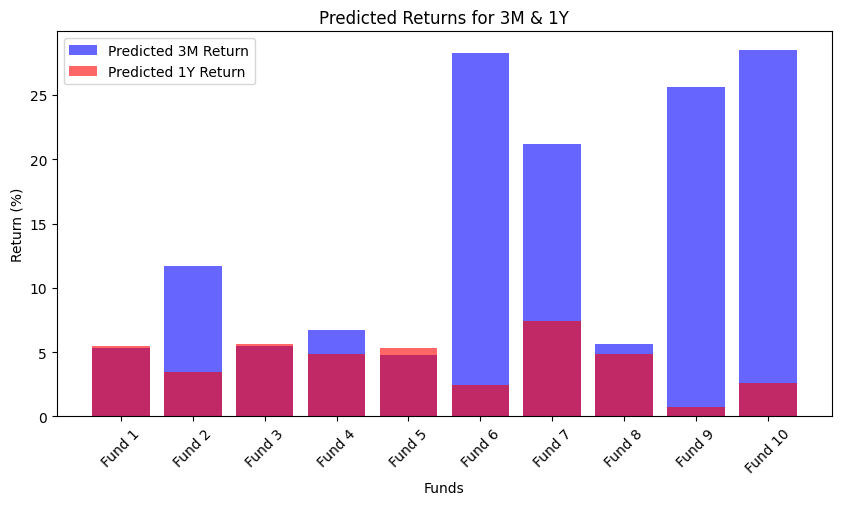

In [ ]:
import matplotlib.pyplot as plt

# Sample Data (Replace with actual predictions)
returns_3M = pred_3M[:10]  # First 10 predictions
returns_1Y = pred_1Y[:10]
funds = [f"Fund {i+1}" for i in range(10)]  # Labels

plt.figure(figsize=(10,5))
plt.bar(funds, returns_3M, color='blue', alpha=0.6, label="Predicted 3M Return")
plt.bar(funds, returns_1Y, color='red', alpha=0.6, label="Predicted 1Y Return")
plt.xlabel("Funds")
plt.ylabel("Return (%)")
plt.title("Predicted Returns for 3M & 1Y")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Original Columns: ['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category', 'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr']
Updated Columns: ['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category', 'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr']
Model Performance Metrics:
1Y Returns - R² Score: -0.98, MAE: 3.98
3Y Returns - R² Score: 0.71, MAE: 4.04
5Y Returns - R² Score: 0.65, MAE: 1.40


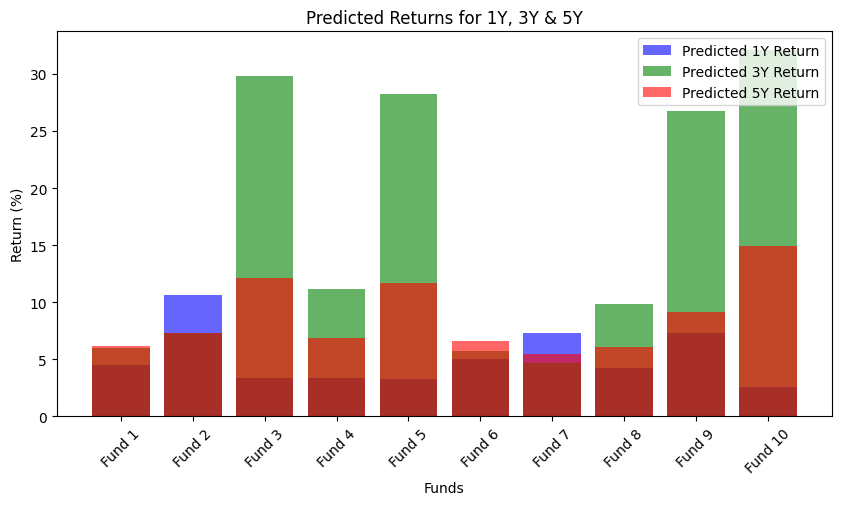

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("mutual_funds_data.csv")  # Change file name accordingly

# Display column names to check for inconsistencies
print("Original Columns:", df.columns.tolist())

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print("Updated Columns:", df.columns.tolist())

# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Convert numeric columns to float
numeric_cols = ["returns_1yr", "returns_3yr", "returns_5yr"]
df[numeric_cols] = df[numeric_cols].astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop non-numeric features to create the feature set
X = df.select_dtypes(include=[np.number]).drop(columns=numeric_cols)

# Define target variables
y_1Y = df["returns_1yr"]
y_3Y = df["returns_3yr"]
y_5Y = df["returns_5yr"]

# Split data for training and testing
X_train, X_test, y_train_1Y, y_test_1Y = train_test_split(X, y_1Y, test_size=0.2, random_state=42)
X_train, X_test, y_train_3Y, y_test_3Y = train_test_split(X, y_3Y, test_size=0.2, random_state=42)
X_train, X_test, y_train_5Y, y_test_5Y = train_test_split(X, y_5Y, test_size=0.2, random_state=42)

# Initialize models
model_1Y = RandomForestRegressor(n_estimators=100, random_state=42)
model_3Y = RandomForestRegressor(n_estimators=100, random_state=42)
model_5Y = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
model_1Y.fit(X_train, y_train_1Y)
model_3Y.fit(X_train, y_train_3Y)
model_5Y.fit(X_train, y_train_5Y)

# Make predictions
pred_1Y = model_1Y.predict(X_test)
pred_3Y = model_3Y.predict(X_test)
pred_5Y = model_5Y.predict(X_test)

# Evaluate models
r2_1Y = r2_score(y_test_1Y, pred_1Y)
r2_3Y = r2_score(y_test_3Y, pred_3Y)
r2_5Y = r2_score(y_test_5Y, pred_5Y)

mae_1Y = mean_absolute_error(y_test_1Y, pred_1Y)
mae_3Y = mean_absolute_error(y_test_3Y, pred_3Y)
mae_5Y = mean_absolute_error(y_test_5Y, pred_5Y)

print("Model Performance Metrics:")
print(f"1Y Returns - R² Score: {r2_1Y:.2f}, MAE: {mae_1Y:.2f}")
print(f"3Y Returns - R² Score: {r2_3Y:.2f}, MAE: {mae_3Y:.2f}")
print(f"5Y Returns - R² Score: {r2_5Y:.2f}, MAE: {mae_5Y:.2f}")

# Visualization
funds = [f"Fund {i+1}" for i in range(10)]
returns_1Y = pred_1Y[:10]
returns_3Y = pred_3Y[:10]
returns_5Y = pred_5Y[:10]

plt.figure(figsize=(10,5))
plt.bar(funds, returns_1Y, color='blue', alpha=0.6, label="Predicted 1Y Return")
plt.bar(funds, returns_3Y, color='green', alpha=0.6, label="Predicted 3Y Return")
plt.bar(funds, returns_5Y, color='red', alpha=0.6, label="Predicted 5Y Return")
plt.xlabel("Funds")
plt.ylabel("Return (%)")
plt.title("Predicted Returns for 1Y, 3Y & 5Y")
plt.legend()
plt.xticks(rotation=45)
plt.show()